In [241]:
import pandas as pd
import numpy as np
import re

# Ignore the warnings
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings(action='ignore', category=FutureWarning, module='xgboost')

In [242]:
df = pd.read_csv("computer_science_education_user_survey.csv")
df.head(2)

,Timestamp,Username,What is your background in Computer Science?,How confident are you with the basics of Computer Science fundamentals?,What platforms do you currently use to study Computer Science?,What features do you look for in a Computer Science course?,Have you ever purchased an online CS course?,How much would you be willing to spend on a premium monthly subscription for a Computer Science course?,What would you say is your learning style?,"In the courses you've taken, do you find illustrations, animations, and/or icons distracting or helpful to your understanding of the subject at hand?","When a course offers a quiz at the end of each lesson/course, do you feel this reinforces your understanding of the content?","Would you be comfortable staying in contact with illustratedJS, including being interviewed to help in our User Testing phase?"
0,2020/10/07 3:42:39 PM AST,barbaraloismoore@gmail.com,Bootcamp,3,Youtube;Leet Code,Videos in your CS language;Conceptual visual v...,No,Up to $20,Visual,Helpful,Yes,Yes
1,2020/10/07 3:44:56 PM AST,duellrdh@gmail.com,Bootcamp,3,Youtube;CodeCademy;Leet Code;CodeSignal;Lambda...,Videos in your CS language;Documented code;Vis...,Yes,Up to $35,Read & Write,Helpful,Yes,Yes


In [243]:
# New column names:'Timestamp', 'Username', 
#                  'Background_CS', 'Confidence_CS',
#                  'Platforms_CS', 'Features_CS', 
#                  'Purchased', 'Max_Amount',
#                  'Learning_Style', 'Visual _Materials',
#                  'Quiz_Importance', 'Cooperativness'.

df_new = df.rename(columns = {'What is your background in Computer Science?':'Background_CS',
                              'How confident are you with the basics of Computer Science fundamentals?':'Confidence_CS',
                              'What platforms do you currently use to study Computer Science?':'Platforms_CS',
                              'What features do you look for in a Computer Science course?':'Features_CS',
                              'Have you ever purchased an online CS course?':'Purchased',
                              'How much would you be willing to spend on a premium monthly subscription for a Computer Science course?':'Max_Amount',
                              'What would you say is your learning style?':'Learning_Style',
                              "In the courses you've taken, do you find illustrations, animations, and/or icons distracting or helpful to your understanding of the subject at hand?":'Visual _Materials',
                              'When a course offers a quiz at the end of each lesson/course, do you feel this reinforces your understanding of the content?':'Quiz_Importance',
                              'Would you be comfortable staying in contact with illustratedJS, including being interviewed to help in our User Testing phase?':'Cooperativness'})

print(df_new.shape)
df_new.head(3)


(134, 12)


,Timestamp,Username,Background_CS,Confidence_CS,Platforms_CS,Features_CS,Purchased,Max_Amount,Learning_Style,Visual _Materials,Quiz_Importance,Cooperativness
0,2020/10/07 3:42:39 PM AST,barbaraloismoore@gmail.com,Bootcamp,3,Youtube;Leet Code,Videos in your CS language;Conceptual visual v...,No,Up to $20,Visual,Helpful,Yes,Yes
1,2020/10/07 3:44:56 PM AST,duellrdh@gmail.com,Bootcamp,3,Youtube;CodeCademy;Leet Code;CodeSignal;Lambda...,Videos in your CS language;Documented code;Vis...,Yes,Up to $35,Read & Write,Helpful,Yes,Yes
2,2020/10/07 3:47:04 PM AST,christine.fletcher0101@gmail.com,Bootcamp,3,Youtube;Leet Code,Videos in your CS language;Conceptual visual v...,Yes,$0 - $10,Auditory,Helpful,Yes,Yes


In [244]:
df_new.dtypes

Timestamp            object
Username             object
Background_CS        object
Confidence_CS         int64
Platforms_CS         object
Features_CS          object
Purchased            object
Max_Amount           object
Learning_Style       object
Visual _Materials    object
Quiz_Importance      object
Cooperativness       object
dtype: object

In [245]:
df_new['Max_Amount'][0]

'Up to $20'

In [246]:
def get_int(cell_contents):
    try:
        return int(re.sub('\D', '', cell_contents))
    except:
        pass

In [247]:
df_new['Max_Amount'] = df_new['Max_Amount'].apply(get_int)

In [248]:
df_new.head(5)

,Timestamp,Username,Background_CS,Confidence_CS,Platforms_CS,Features_CS,Purchased,Max_Amount,Learning_Style,Visual _Materials,Quiz_Importance,Cooperativness
0,2020/10/07 3:42:39 PM AST,barbaraloismoore@gmail.com,Bootcamp,3,Youtube;Leet Code,Videos in your CS language;Conceptual visual v...,No,20.0,Visual,Helpful,Yes,Yes
1,2020/10/07 3:44:56 PM AST,duellrdh@gmail.com,Bootcamp,3,Youtube;CodeCademy;Leet Code;CodeSignal;Lambda...,Videos in your CS language;Documented code;Vis...,Yes,35.0,Read & Write,Helpful,Yes,Yes
2,2020/10/07 3:47:04 PM AST,christine.fletcher0101@gmail.com,Bootcamp,3,Youtube;Leet Code,Videos in your CS language;Conceptual visual v...,Yes,10.0,Auditory,Helpful,Yes,Yes
3,2020/10/07 3:47:50 PM AST,natalienetworks@gmail.com,Bootcamp,3,Udemy;Algo Expert;Leet Code;HackerRank,Conceptual visual videos;Documented code;Visua...,Yes,20.0,Kinesthetic,Helpful,No,Yes
4,2020/10/07 3:49:03 PM AST,joowoonk@gmail.com,Bootcamp,2,Youtube;Leet Code;Educative,Conceptual visual videos;Visualizations/animat...,Yes,20.0,Auditory,Helpful,Yes,No


In [249]:
df_new.isnull().sum()

Timestamp            0
Username             0
Background_CS        0
Confidence_CS        0
Platforms_CS         0
Features_CS          0
Purchased            0
Max_Amount           1
Learning_Style       0
Visual _Materials    1
Quiz_Importance      2
Cooperativness       1
dtype: int64

In [250]:
df_new['Max_Amount'].value_counts()

10.0    66
20.0    37
30.0    11
25.0    10
35.0     9
Name: Max_Amount, dtype: int64

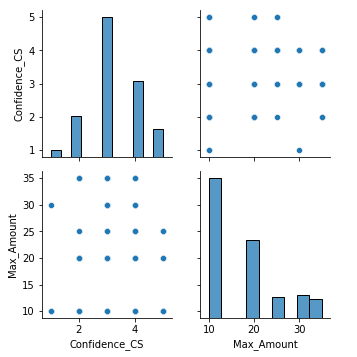

In [251]:
import seaborn as sns
ax = sns.pairplot(df_new)

In [252]:
df_new['Learning_Style'].value_counts()

Visual          50
Kinesthetic     46
Read & Write    31
Auditory         7
Name: Learning_Style, dtype: int64

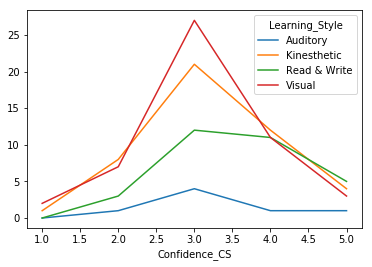

In [253]:
pd.crosstab(df_new['Confidence_CS'],df_new['Learning_Style']).plot();

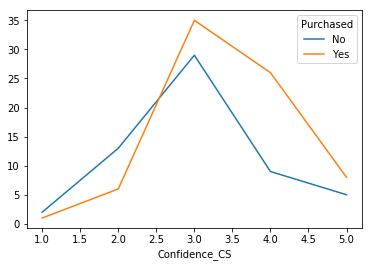

In [254]:
pd.crosstab(df_new['Confidence_CS'],df_new['Purchased']).plot();

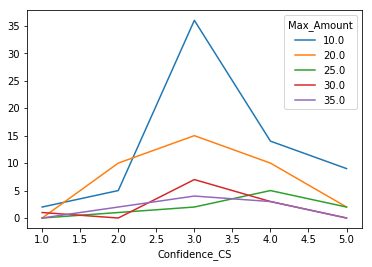

In [255]:
pd.crosstab(df_new['Confidence_CS'],df_new['Max_Amount']).plot();

In [256]:
df_new['Platforms_CS'][0]

'Youtube;Leet Code'

In [257]:
def split_str(cell_contents):
    try:
        return cell_contents.lower().replace(', ', ';').split(';')
    except:
        pass

In [258]:
df_new['Platforms_CS'] = df_new['Platforms_CS'].apply(split_str)

In [259]:
df_new['Platforms_CS']

0                                   [youtube, leet code]
1      [youtube, codecademy, leet code, codesignal, l...
2                                   [youtube, leet code]
3            [udemy, algo expert, leet code, hackerrank]
4                        [youtube, leet code, educative]
                             ...                        
129                     [youtube, leet code, hackerrank]
130                                            [youtube]
131    [youtube, udemy, codecademy, leet code, hacker...
132         [youtube, leet code, hackerrank, codesignal]
133    [leet code, lambda school, khan academy, cs50 ...
Name: Platforms_CS, Length: 134, dtype: object

In [260]:
# df_new['tokens'] = df_new['Platforms_CS'].apply(tokenize)
# df_new['tokens']

In [261]:
cache = {}
for entry in df_new['Platforms_CS']:
    for i in entry:
        if i in cache:
            cache[i] += 1
        else:
            cache[i] = 1
            
for i in list(cache):
    if 'google' in i and i != 'google':
        cache['google'] += cache[i]
        del cache[i]
    elif 'lambda' in i and i != 'lambda':
        cache['google'] += cache[i]
        del cache[i]
        
print(cache)

{'youtube': 105, 'leet code': 85, 'codecademy': 20, 'codesignal': 42, 'udemy': 56, 'algo expert': 14, 'hackerrank': 66, 'educative': 11, 'frontend masters': 21, 'codewars': 1, 'real python': 1, 'books': 2, 'exercism': 1, 'google': 15, 'npm': 1, 'github': 1, "the tech's documentation": 1, 'geek for geeks': 1, 'mdn': 1, 'textbooks': 2, 'medium': 1, 'dev.to': 1, 'linkedin learning': 1, 'interviewcake/practice': 1, 'other various code challenge sites like project euler': 1, 'and my own small projects': 1, 'coursera': 2, 'lambda': 2, 'geekforgeeks': 1, 'teamtreehouse': 1, 'pluralsight': 1, 'i volunteer to write docs or edit materials for projects and become familiar in that manner': 1, 'not really anything': 1, 'trying to brush up on web core skills': 1, "i don't": 1, 'i just go to work': 1, 'interview cake': 1, 'free intro to cs material from colleges': 1, 'codility': 1, 'khan academy': 1, 'cs50 at harvard': 1, 'cs61 at berkeley ': 1}


In [262]:
# c = {k: v for k, v in sorted(cache.items(), key=lambda item: item[1], reverse=True)}
# print(c)

In [263]:
cols = list({k: v for k, v in sorted(cache.items(), key=lambda item: item[1], reverse=True)})[:10]
cols.append('lambda')
# cols.append('other')
cols

['youtube',
 'leet code',
 'hackerrank',
 'udemy',
 'codesignal',
 'frontend masters',
 'codecademy',
 'google',
 'algo expert',
 'educative',
 'lambda']

In [264]:
def col(dataset):

  X = dataset.copy()

  X = X[X['Max_Amount'].notna()]
  X.reset_index(drop=True, inplace=True)

  data = []
  for index, row in X.iterrows():
    row_input = []
    for column in cols:
      if column in (row['Platforms_CS']):
        row_input.append(1)
      else:
        row_input.append(0)
    data.append(row_input)

  X = X.join(pd.DataFrame(data, columns=cols))

  return X

In [265]:
data = col(df_new)
data = data.drop(['Platforms_CS'], axis=1)
print(data.shape)
data.head(3)

(133, 22)


,Timestamp,Username,Background_CS,Confidence_CS,Features_CS,Purchased,Max_Amount,Learning_Style,Visual _Materials,Quiz_Importance,...,leet code,hackerrank,udemy,codesignal,frontend masters,codecademy,google,algo expert,educative,lambda
0,2020/10/07 3:42:39 PM AST,barbaraloismoore@gmail.com,Bootcamp,3,Videos in your CS language;Conceptual visual v...,No,20.0,Visual,Helpful,Yes,...,1,0,0,0,0,0,0,0,0,0
1,2020/10/07 3:44:56 PM AST,duellrdh@gmail.com,Bootcamp,3,Videos in your CS language;Documented code;Vis...,Yes,35.0,Read & Write,Helpful,Yes,...,1,0,0,1,0,1,0,0,0,0
2,2020/10/07 3:47:04 PM AST,christine.fletcher0101@gmail.com,Bootcamp,3,Videos in your CS language;Conceptual visual v...,Yes,10.0,Auditory,Helpful,Yes,...,1,0,0,0,0,0,0,0,0,0


In [266]:
# import seaborn as sns
# ax = sns.pairplot(data)

In [267]:
# a = df_new[df_new['Max_Amount'].notna()]

In [268]:
data['Max_Amount'].value_counts()

10.0    66
20.0    37
30.0    11
25.0    10
35.0     9
Name: Max_Amount, dtype: int64

In [269]:
from sklearn.model_selection import train_test_split

# Split train into train & val
train, test = train_test_split(data, train_size=0.80, test_size=0.20, random_state=42)

train.shape, test.shape

((106, 22), (27, 22))

In [270]:
train.head(2)

,Timestamp,Username,Background_CS,Confidence_CS,Features_CS,Purchased,Max_Amount,Learning_Style,Visual _Materials,Quiz_Importance,...,leet code,hackerrank,udemy,codesignal,frontend masters,codecademy,google,algo expert,educative,lambda
125,2020/10/16 1:17:06 PM AST,tashingsworth@gmail.com,Bootcamp,2,Videos in your CS language;Conceptual visual v...,Yes,10.0,Kinesthetic,Unsure,Yes,...,0,0,1,0,1,0,0,0,0,0
109,2020/10/14 11:56:56 AM AST,kimberlyboyd2@gmail.com,Bootcamp,2,Videos in your CS language;Conceptual visual v...,No,20.0,Visual,Helpful,Yes,...,0,0,0,1,0,0,0,0,0,0


In [271]:
# The status_group column is the target
target = 'Max_Amount'

# Get a dataframe with all train columns except the target & 'Timestamp', 'Username', 'Features_CS'
features = ['Background_CS', 'Confidence_CS', 'Purchased', 'Learning_Style',
            'Visual _Materials', 'Quiz_Importance', 'Cooperativness', 'youtube',
            'leet code', 'hackerrank', 'udemy', 'codesignal', 'frontend masters',
            'codecademy', 'google', 'algo expert', 'educative', 'lambda']
# print(features)

In [272]:
# train.columns

In [273]:
# Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

In [274]:
# pip install category_encoders

In [276]:
from sklearn.tree import DecisionTreeClassifier
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='mean'), 
    DecisionTreeClassifier(random_state=42))

# Fit on train
pipeline.fit(X_train, y_train)

# Score on train, test
print('Train Accuracy', pipeline.score(X_train, y_train))
print('Test Accuracy', pipeline.score(X_test, y_test))

Train Accuracy 0.9905660377358491
Test Accuracy 0.3333333333333333


In [277]:
# # Predict on test
# y_pred = pipeline.predict(X_test)
# print(y_pred)